In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
data_url="winequality-red.csv"
data=pd.read_csv(data_url,sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
feature_list=data.columns[:-1].values
label=[data.columns[-1]]
print("Feature list:",feature_list)
print("Label:",label)

Feature list: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [40]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [41]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Text(0, 0.5, 'Count')

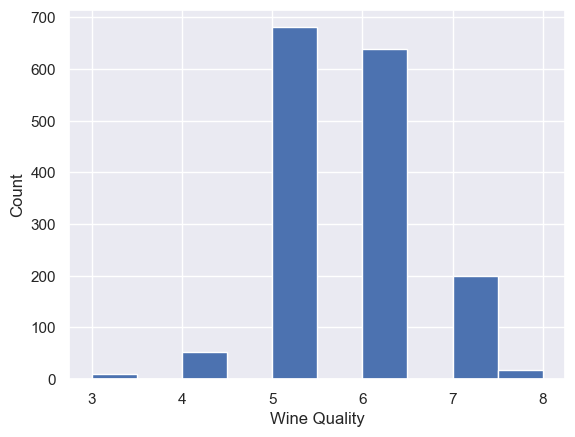

In [42]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

In [47]:
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size]
    return data.iloc[train_indices],data.iloc[test_indices]

In [48]:
train_set,test_set=split_train_test(data,0.2)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [93]:
train_set,test=train_test_split(data,test_size=0.2,random_state=42)

Text(0, 0.5, 'Count')

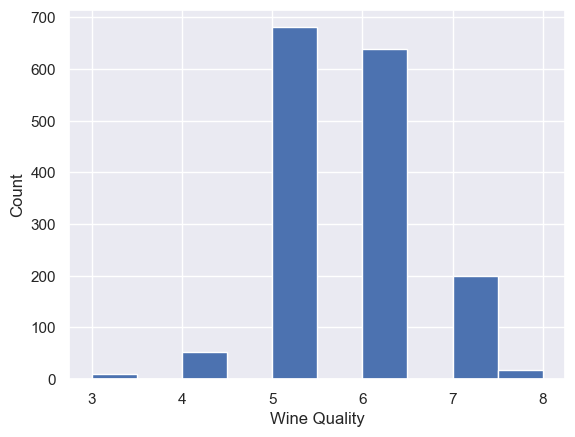

In [94]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data["quality"]):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[train_index]

In [97]:
strat_dist=strat_test_set["quality"].value_counts()/len(strat_test_set)

In [98]:
overall_dist=data["quality"].value_counts()/len(data)

In [99]:
dist_comparison

,overall,stratified,diff(s-o),diff(s-o)_pct
quality,,,,
5,0.425891,0.426114,2.229697e-04,0.052354
6,0.398999,0.398749,-2.503519e-04,-0.062745
7,0.124453,0.124316,-1.369112e-04,-0.110011
4,0.033146,0.032838,-3.075613e-04,-0.927907
8,0.011257,0.011728,4.708768e-04,4.182955
3,0.006254,0.006255,9.779372e-07,0.015637


In [100]:
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100 * (dist_comparison['diff(s-o)'] / dist_comparison['overall'].replace(0, pd.NA))

In [101]:
dist_comparison

,overall,stratified,diff(s-o),diff(s-o)_pct
quality,,,,
5,0.425891,0.426114,2.229697e-04,0.052354
6,0.398999,0.398749,-2.503519e-04,-0.062745
7,0.124453,0.124316,-1.369112e-04,-0.110011
4,0.033146,0.032838,-3.075613e-04,-0.927907
8,0.011257,0.011728,4.708768e-04,4.182955
3,0.006254,0.006255,9.779372e-07,0.015637


In [76]:
random_dist=test_set["quality"].value_counts()/len(test_set)
random_dist

quality
6    0.413793
5    0.407524
7    0.131661
4    0.028213
8    0.015674
3    0.003135
Name: count, dtype: float64

In [77]:
random_dist=test_set["quality"].value_counts()/len(test_set)
random_dist

quality
6    0.413793
5    0.407524
7    0.131661
4    0.028213
8    0.015674
3    0.003135
Name: count, dtype: float64

In [79]:
print(dist_comparison.columns)

Index(['overall', 'stratified', 'diff(s-o)', 'diff(r-o)_pct'], dtype='object')


In [69]:
#dist_comparison['diff(r-o)']=dist_comparison['stratified']-dist_comparison['overall']
#dist_comparison['diff(r-o)_pct']=100*(dist_comparison['diff(r-o)']/dist_comparison['overall'].replace(0,pd.NA))


In [84]:
dist_comparison.loc[:, ['diff(s-o)', 'diff(r-o)_pct']]

,diff(s-o),diff(r-o)_pct
quality,,
5,2.229697e-04,0.052354
6,-2.503519e-04,-0.062745
7,-1.369112e-04,-0.110011
4,-3.075613e-04,-0.927907
8,4.708768e-04,4.182955
3,9.779372e-07,0.015637
